In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot: >

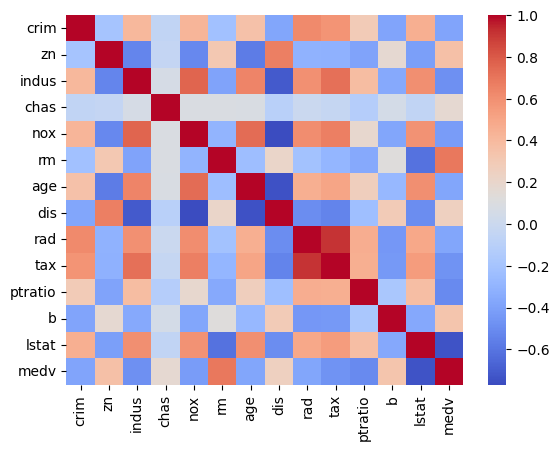

In [3]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')

In [4]:
X=df.drop('medv', axis=1)
y=df['medv']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

In [8]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 559.2890
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 355.0206
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 112.3910
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 57.5266
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 27.2921
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 22.0751
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 19.3569
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 17.7513
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 16.2992
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 15.5094
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 14.5884
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 14.0472
Epoch 13/100
13/13 [==

In [9]:
loss=model.evaluate(X_test_scaled, y_test)
loss

4/4 [==============================] - 0s 673us/step - loss: 10.4590


10.45903205871582

In [10]:
pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


<AxesSubplot: xlabel='medv'>

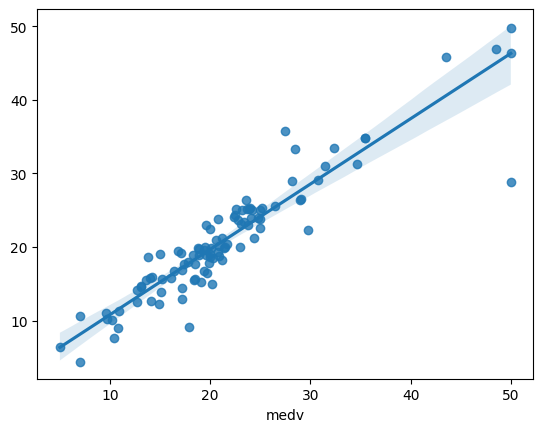

In [11]:
sns.regplot(x=y_test, y=pred)